# Analyze weights

In [1]:
import os
import sys
import math
from operator import add
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [ ]:
my_path_flat = "/home/happy/Documents/ICRA25_plot/Gecko_HebbPlasticity/weights_overtime_eval/flat/25/"

weight_l12_flat = np.load(my_path_flat + "weight_l12.npy", allow_pickle=True)
weight_l23_flat = np.load(my_path_flat + "weight_l23.npy", allow_pickle=True)
weight_l34_flat = np.load(my_path_flat + "weight_l34.npy", allow_pickle=True)

# print(weight_l12_flat[0,:].shape)
# print(weight_l23_flat[0,:].shape)
# print(weight_l34_flat[0,:].shape)


my_path_rough = "/home/happy/Documents/ICRA25_plot/Gecko_HebbPlasticity/weights_overtime_eval/rough/25/"

weight_l12_rough = np.load(my_path_rough + "weight_l12.npy", allow_pickle=True)
weight_l23_rough = np.load(my_path_rough + "weight_l23.npy", allow_pickle=True)
weight_l34_rough = np.load(my_path_rough + "weight_l34.npy", allow_pickle=True)

# print(weight_l12_rough[0,:].shape)
# print(weight_l23_rough[0,:].shape)
# print(weight_l34_rough[0,:].shape)


my_path_LFdamaged = "/home/happy/Documents/ICRA25_plot/Gecko_HebbPlasticity/weights_overtime_eval/LF_damaged/17/"

weight_l12_LFdamaged = np.load(my_path_LFdamaged + "weight_l12.npy", allow_pickle=True)
weight_l23_LFdamaged = np.load(my_path_LFdamaged + "weight_l23.npy", allow_pickle=True)
weight_l34_LFdamaged = np.load(my_path_LFdamaged + "weight_l34.npy", allow_pickle=True)

# print(weight_l12_LFdamaged[0,:].shape)
# print(weight_l23_LFdamaged[0,:].shape)
# print(weight_l34_LFdamaged[0,:].shape)


my_path_RHdamaged = "/home/happy/Documents/ICRA25_plot/Gecko_HebbPlasticity/weights_overtime_eval/RH_damaged/7/"

weight_l12_RHdamaged = np.load(my_path_RHdamaged + "weight_l12.npy", allow_pickle=True)
weight_l23_RHdamaged = np.load(my_path_RHdamaged + "weight_l23.npy", allow_pickle=True)
weight_l34_RHdamaged = np.load(my_path_RHdamaged + "weight_l34.npy", allow_pickle=True)

# print(weight_l12_RHdamaged[0,:].shape)
# print(weight_l23_RHdamaged[0,:].shape)
# print(weight_l34_RHdamaged[0,:].shape)


my_path_Frontdamaged = "/home/happy/Documents/ICRA25_plot/Gecko_HebbPlasticity/weights_overtime_eval/front_damaged/8/"

weight_l12_Frontdamaged = np.load(my_path_Frontdamaged + "weight_l12.npy", allow_pickle=True)
weight_l23_Frontdamaged = np.load(my_path_Frontdamaged + "weight_l23.npy", allow_pickle=True)
weight_l34_Frontdamaged = np.load(my_path_Frontdamaged + "weight_l34.npy", allow_pickle=True)


In [3]:
weights_flat = np.hstack((weight_l12_flat, weight_l23_flat, weight_l34_flat))
weights_rough = np.hstack((weight_l12_rough, weight_l23_rough, weight_l34_rough))
weights_LFdamaged = np.hstack((weight_l12_LFdamaged, weight_l23_LFdamaged, weight_l34_LFdamaged))
weights_RHdamaged = np.hstack((weight_l12_RHdamaged, weight_l23_RHdamaged, weight_l34_RHdamaged))
weights_Frontdamaged = np.hstack((weight_l12_Frontdamaged, weight_l23_Frontdamaged, weight_l34_Frontdamaged))

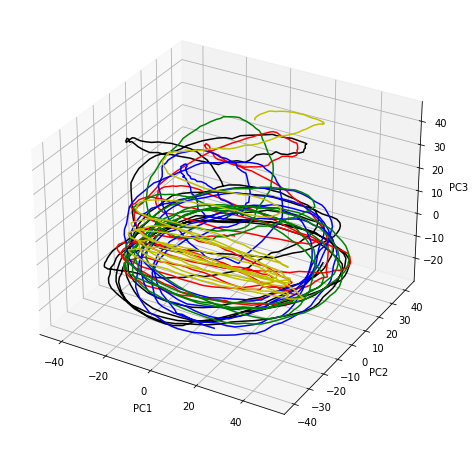

In [ ]:
# Apply PCA to reduce the dimensionality to 3 components for 3D visualization
pca = PCA(n_components=3)
weights_pca_flat = pca.fit_transform(weights_flat)
weights_pca_rough = pca.fit_transform(weights_rough)
weights_pca_LFdamaged = pca.fit_transform(weights_LFdamaged)
weights_pca_RHdamaged = pca.fit_transform(weights_RHdamaged)
weights_pca_Frontdamaged = pca.fit_transform(weights_Frontdamaged)

# Plot the results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(weights_pca_flat[:, 0], weights_pca_flat[:, 1], weights_pca_flat[:, 2], color='k',  linestyle='-', marker='')
ax.plot(weights_pca_rough[:, 0], weights_pca_rough[:, 1], weights_pca_rough[:, 2], color='r', linestyle='-', marker='')


ax.plot(weights_pca_LFdamaged[:, 0], weights_pca_LFdamaged[:, 1], weights_pca_LFdamaged[:, 2], color='b', linestyle='-', marker='')
ax.plot(weights_pca_RHdamaged[:, 0], weights_pca_RHdamaged[:, 1], weights_pca_RHdamaged[:, 2], color='g', linestyle='-', marker='')
ax.plot(weights_pca_Frontdamaged[:, 0], weights_pca_Frontdamaged[:, 1], weights_pca_Frontdamaged[:, 2], color='y', linestyle='-', marker='')

# Set plot titles and labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

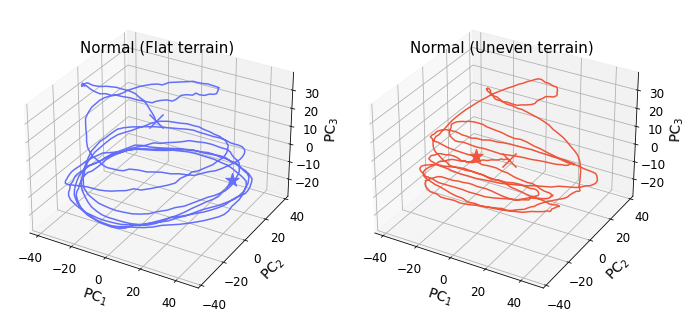

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
weights_pca_flat = pca.fit_transform(weights_flat)
weights_pca_rough = pca.fit_transform(weights_rough)


# Determine global axis limitsnormal
all_data = np.vstack([weights_pca_flat, weights_pca_rough])
x_min, x_max = all_data[:, 0].min(), all_data[:, 0].max()
y_min, y_max = all_data[:, 1].min(), all_data[:, 1].max()
z_min, z_max = all_data[:, 2].min(), all_data[:, 2].max()

# Define colors
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#19D3F3']

# Plot settings
fig, axes = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})
conditions = [
    ('Normal (Flat terrain)', weights_pca_flat, colors[0]),
    ('Normal (Uneven terrain)', weights_pca_rough, colors[1]),
]

for ax, (title, data, color) in zip(axes, conditions):
    ax.plot(data[:, 0], data[:, 1], data[:, 2], color=color, linestyle='-', marker='')
    ax.scatter(data[0, 0], data[0, 1], data[0, 2], color=color, marker='x', s=200)
    ax.scatter(data[-1, 0], data[-1, 1], data[-1, 2], color=color, marker='*', s=200)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    ax.set_title(title, y=0.90, fontsize=15)
    ax.set_xlabel('PC$_1$', fontsize=14, labelpad=5)  # Adjust font size and padding
    ax.set_ylabel('PC$_2$', fontsize=14, labelpad=5)
    ax.set_zlabel('PC$_3$', fontsize=14, labelpad=5)

    ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label size
    ax.tick_params(axis='z', which='major', labelsize=12)  # Adjust tick size for z-axis


plt.tight_layout(pad = 3.0)

plt.show()


/home/happy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


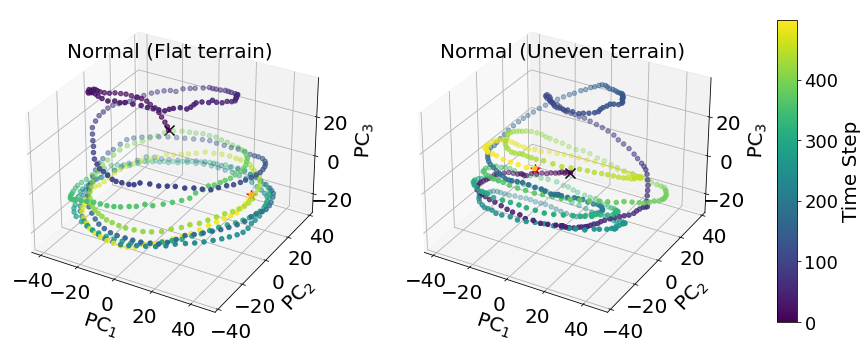

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
weights_pca_flat = pca.fit_transform(weights_flat)
weights_pca_rough = pca.fit_transform(weights_rough)

# Determine global axis limits
all_data = np.vstack([weights_pca_flat, weights_pca_rough])
x_min, x_max = all_data[:, 0].min(), all_data[:, 0].max()
y_min, y_max = all_data[:, 1].min(), all_data[:, 1].max()
z_min, z_max = all_data[:, 2].min(), all_data[:, 2].max()

# Shared color settings
time_steps = np.arange(len(weights_pca_flat))  # Time steps from 0 to 99
cmap = cm.viridis  # Common colormap
norm = plt.Normalize(time_steps.min(), time_steps.max())  # Normalize for color mapping
colors_mapped = cmap(norm(time_steps))  # Map time steps to colors

# Plot settings
fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'}, gridspec_kw={'wspace': 0.01})  # Adjust space between plots

conditions = [
    ('Normal (Flat terrain)', weights_pca_flat),
    ('Normal (Uneven terrain)', weights_pca_rough),
]

for ax, (title, data) in zip(axes, conditions):
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors_mapped, marker='o', cmap=cmap)
    
    # Mark the Start and End points on the plot
    ax.scatter(data[0, 0], data[0, 1], data[0, 2], color='black', marker='x', s=100)  # Start
    ax.scatter(data[-1, 0], data[-1, 1], data[-1, 2], color='red', marker='*', s=100)  # End
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    
    ax.set_title(title, y=0.90, fontsize=20)
    ax.set_xlabel('PC$_1$', fontsize=20, labelpad=10)
    ax.set_ylabel('PC$_2$', fontsize=20, labelpad=10)
    ax.set_zlabel('PC$_3$', fontsize=20, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Shared colorbar (aligned on the right)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position: [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label("Time Step", fontsize=20)
cbar.ax.tick_params(labelsize=18)  # Adjust tick label font size


plt.tight_layout(rect=[0, 0, 0.90, 1])  # Adjust layout to make space for color bar
plt.show()
